## Importing libraries

For any issues running these modules, use python -m pip install -r requirements.txt

In [30]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pandas as pd
import numpy as np
import yfinance as yf
import sklearn
import plotly.graph_objects as go
import plotly.io as pio
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Load data, add a new field

In [31]:
apple = yf.Ticker("AAPL")
hist = apple.history(start="2000-01-01", end="2020-09-30", actions=False)
percent = (hist["Close"]-hist["Open"])/hist["Open"]*100
hist["%Increase"] = percent

## Extract data

In [32]:
## TO DO

#Explore dataset
hist.head()
hist.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
%Increase    float64
dtype: object

## Plot Data

Visualize the data that we have extracted to better understand trends to expect and routes to go for changing parameters.

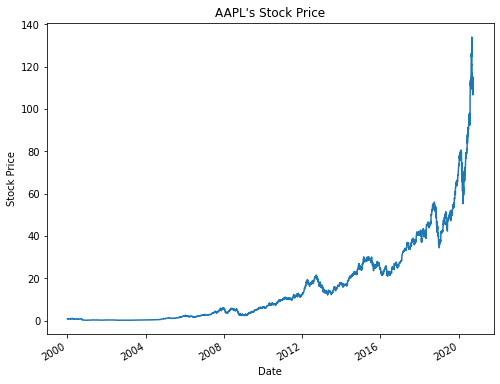

In [29]:
# Quarterly history of Tablular data:
def cleanHist(hist):
    clean_hist = hist.copy()
    for index, row in hist.iterrows():
        if np.isnan(row['Open']):
            clean_hist = clean_hist.drop(index)
    return clean_hist

# Converts timestamp object to nice-looking date
def convertTimeStamp(timestamp):
    return str(timestamp)[5:7] + "/" + str(timestamp)[:4]

def getDates(index):
    return [convertTimeStamp(timestamp) for timestamp in index]

quarterly_hist = apple.history(start="2000-01-01", end="2020-09-30", interval="3mo", actions=False)
quarterly_percent = (quarterly_hist["Close"]-quarterly_hist["Open"])/quarterly_hist["Open"]*100
quarterly_hist["%Increase"] = quarterly_percent
quarterly_hist = cleanHist(quarterly_hist)

# Table of quarterly data
fig = go.Figure(data=[go.Table(
    header=dict(values=['Date'] + list(quarterly_hist.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[getDates(quarterly_hist.index), round(quarterly_hist['Open'], 4),
                       round(quarterly_hist['High'], 4), round(quarterly_hist['Low'], 4),
                       round(quarterly_hist['Close'], 4), quarterly_hist['Volume'],
                       round(quarterly_hist['%Increase'], 4)],
               fill_color='lavender',
               align='center'))
])

fig.show()

# AAPL Stock Price
fig = plt.figure(figsize=(8, 14))
ax1 = fig.add_subplot(211)
ax1.set_title('AAPL\'s Stock Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price')
hist["Close"].plot()
plt.show()

# AAPL Bar Chart
bar_chart = {
    'x': hist.index,
    'open': hist.Open,
    'close': hist.Close,
    'high': hist.High,
    'low': hist.Low,
    'type': 'candlestick',
    'name': 'AAPL',
    'showlegend': True
}

pio.show(bar_chart)


## Data preparation

If we want to transform the data in any way, we can do it here.
(Maybe we can transform the date (month/day of the year) to a one-hot array)

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


labels=["01/20", "01/21", "01/22"]
# Generates an int for each label
y=le.fit_transform(labels)

# Prints out each date with its int mapping
for c in list(le.classes_):
    print(le.transform([c])[0], c)

0 01/20
1 01/21
2 01/22


In [ ]:
## Reshape data here as necessary

In [ ]:
#Create train set and test set
train_set_size = 5000
data = np.array(hist)
train_data = data[:train_set_size]
test_data = data[train_set_size:]
x_train = data[:train_set_size,:-1]
y_train = data[:train_set_size,-1]
x_test = data[train_set_size:,:-1]
y_test = data[train_set_size:,-1]
x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train = torch.from_numpy(y_train).type(torch.Tensor)
y_test = torch.from_numpy(y_test).type(torch.Tensor)

# We could try this as it might be a bit easier to use
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(np.array(data_to_be_added),np.array(y),stratify=y,test_size = 0.2,random_state=777,shuffle=True)


## Initializing the model

In [ ]:
# I only have experience with keras, so I have to get familiar with pytorch

# from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
# from keras.models import Model
# from keras.callbacks import EarlyStopping, ModelCheckpoint
# from keras import backend as K

In [ ]:
# K.clear_session()

# inputs = Input(shape=(8000,1))

# #First Conv1D layer
# conv = Conv1D(8,13, padding='valid', activation='relu', strides=1)(inputs)
# conv = MaxPooling1D(3)(conv)
# conv = Dropout(0.3)(conv)

# #Second Conv1D layer
# conv = Conv1D(16, 11, padding='valid', activation='relu', strides=1)(conv)
# conv = MaxPooling1D(3)(conv)
# conv = Dropout(0.3)(conv)

# #Third Conv1D layer
# conv = Conv1D(32, 9, padding='valid', activation='relu', strides=1)(conv)
# conv = MaxPooling1D(3)(conv)
# conv = Dropout(0.3)(conv)

# #Flatten layer
# conv = Flatten()(conv)

# #Dense Layer 1
# conv = Dense(128, activation='relu')(conv)
# conv = Dropout(0.3)(conv)

# # Output layer
# outputs = Dense(len(labels), activation='softmax')(conv)

# model = Model(inputs, outputs)
# model.summary()

In [ ]:
# model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.0001) 
# mc = ModelCheckpoint('best_model.hdf5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

## Training the model

In [ ]:
history=model.fit(x_tr, y_tr ,epochs=10, callbacks=[es,mc], batch_size=32, validation_data=(x_val,y_val))

print("MODEL TRAINING COMPLETE!")

## Post Visualization

Now we can take a look at how successful our model is and can easily find where overfitting takes place (if at all)

In [33]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'], label='train') 
plt.plot(history.history['val_loss'], label='test') 
plt.legend() 
plt.show()

plt.plot(history.history['accuracy'], label='train') 
plt.plot(history.history['val_accuracy'], label='test') 
plt.legend() 
plt.show()

NameError: name 'history' is not defined

In [ ]:
# For the application part (maybe a separate file), we can use our model to predict the future performance

from keras.models import load_model
model=load_model('best_model.hdf5')